In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn import preprocessing

#time = 10 #sec
slot = 1000000
sensores = 4


data = np.ones((slot, sensores))

data = np.transpose(np.array([np.random.normal(0, 8, slot), 
                                    np.random.normal(26.52, 12, slot),
                                    np.random.normal(84.58, 5, slot),
                                    np.random.normal(100, 5, slot)]))

data = preprocessing.normalize(data)

print(data.shape)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


(1000000, 4)


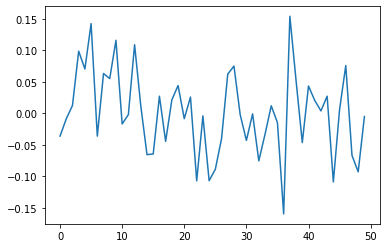

In [2]:
plt.plot(data[:50,0]) #out_pressure

In [3]:
N = slot # sample count
P = 5000  # period
D = 5   # width of pulse
sig = np.arange(N) % P < D

data[:,0] = sig + data[:,0]
data[:,0] = sig + data[:,1]
data[:,0] = sig + data[:,2]
data[:,0] = sig + data[:,3]

#plt.plot(signal)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(data, test_size=0.15, random_state=1)

print(X_train.shape)
print(X_test.shape)

(850000, 4)
(150000, 4)


In [5]:
import h5py

h5f = h5py.File('../Datasets/sintetic_data/train_compressor_data.h5', 'w')
h5f.create_dataset('data_train', data = X_train)

h5f = h5py.File('../Datasets/sintetic_data/test_compressor_data.h5', 'w')
h5f.create_dataset('data_test', data = X_test)

<HDF5 dataset "data_test": shape (150000, 4), type "<f8">

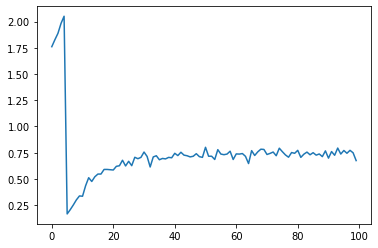

In [6]:
#ramp


sig_linear = np.arange(0, 100, 1)

sig_exp = -0.9**np.arange(0, 100, 1)

signal = sig[:100] + data[:100, 0] + sig_exp

plt.plot(signal)

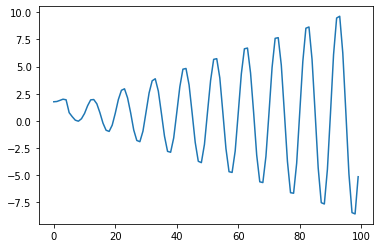

In [7]:
T = 10

f = 1/T

t = np.arange(0 , T, f)


A = t



carrier = A*np.sin(2*np.pi*t)

carrier = data[:len(carrier), 0] + carrier

plt.plot(carrier)

In [8]:
class SinteticSignal:

IndentationError: expected an indented block (982907090.py, line 1)